Preprocess the HAM10000 dataset

Forked from MEDFAIR:
https://github.com/ys-zong/MEDFAIR/blob/main/notebooks/HAM10000-example.ipynb

We assume you have already downloaded and extracted the data in `/mnt/HAM10000/`.
Change the path below if you have extracted the data elsewhere.

This directory should contain an `images/` directory with the 10k images,
and a `HAM10000_metadata.csv` file with the metadata. We will create new csv files for
the splits and will save them to `split_dir`, which is by default the splits/ dir in this repo.

Since the final files are uploaded in this repo, there is no need to run this notebook again. It is just included so you can reproduce the splits from scratch if needed.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# where the data is, n.b we expect the images to live in DATA_DIR/images/
DATA_DIR = "/mnt/HAM10000/"
SPLIT_DIR = "../splits/ham10000/"  # where we save the split csv files

os.makedirs(SPLIT_DIR, exist_ok=True)
demo_data = pd.read_csv(os.path.join(DATA_DIR, "HAM10000_metadata.csv"))
print(demo_data.shape)
demo_data.head()

(10015, 8)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern


In [2]:

print("adding image paths to metadata")
pathlist = demo_data["image_id"].values.tolist()  # type: ignore
paths = ["images/" + i + ".jpg" for i in pathlist]
demo_data["Path"] = paths
print(demo_data.shape)
demo_data.head()

adding image paths to metadata
(10015, 9)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,images/ISIC_0031633.jpg


In [3]:

print("pruning data with no subgroup information")
demo_data = demo_data[~demo_data["age"].isnull()]
demo_data = demo_data[~demo_data["sex"].isnull()]
print(demo_data.shape)

pruning data with no subgroup information
(9958, 9)


In [4]:
print("unify sex names")
# male -> 0, female -> 1
demo_data["Sex"] = np.where(demo_data["sex"].values == "male", 0, 1)
print(demo_data.shape)
demo_data

unify sex names
(9958, 10)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Path,Sex
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0027419.jpg,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025030.jpg,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0026769.jpg,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025661.jpg,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,images/ISIC_0031633.jpg,0
...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033084.jpg,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033550.jpg,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033536.jpg,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,images/ISIC_0032854.jpg,0


In [5]:
print("splitting age groups")
demo_data["Age_multi"] = demo_data["age"].values.astype("int")
demo_data["Age_multi"] = np.where(
    demo_data["Age_multi"].between(-1, 19), 0, demo_data["Age_multi"]
)
demo_data["Age_multi"] = np.where(
    demo_data["Age_multi"].between(20, 39), 1, demo_data["Age_multi"]
)
demo_data["Age_multi"] = np.where(
    demo_data["Age_multi"].between(40, 59), 2, demo_data["Age_multi"]
)
demo_data["Age_multi"] = np.where(
    demo_data["Age_multi"].between(60, 79), 3, demo_data["Age_multi"]
)
demo_data["Age_multi"] = np.where(
    demo_data["Age_multi"] >= 80, 4, demo_data["Age_multi"]
)

demo_data["Age_binary"] = demo_data["age"].values.astype("int")
demo_data["Age_binary"] = np.where(
    demo_data["Age_binary"].between(-1, 60), 0, demo_data["Age_binary"]
)
demo_data["Age_binary"] = np.where(
    demo_data["Age_binary"] >= 60, 1, demo_data["Age_binary"]
)

# We will mostly use the binary age attribute instead of the multi-class one
demo_data["Age"] = demo_data["Age_binary"]

print(demo_data.shape)
demo_data

splitting age groups
(9958, 13)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Path,Sex,Age_multi,Age_binary,Age
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0027419.jpg,0,4,1,1
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025030.jpg,0,4,1,1
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0026769.jpg,0,4,1,1
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025661.jpg,0,4,1,1
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,images/ISIC_0031633.jpg,0,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033084.jpg,0,2,0,0
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033550.jpg,0,2,0,0
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033536.jpg,0,2,0,0
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,images/ISIC_0032854.jpg,0,4,1,1


In [6]:
print("converting to binary labels")
# benign: bcc, bkl, dermatofibroma, nv, vasc
# maglinant: akiec, mel

labels = demo_data["dx"].values.copy()
labels[labels == "akiec"] = "1"  # type: ignore
labels[labels == "mel"] = "1"  # type: ignore
labels[labels != "1"] = "0"  # type: ignore

labels = labels.astype("int")  # type: ignore

demo_data["binaryLabel"] = labels

print(demo_data.shape)
demo_data

converting to binary labels
(9958, 14)


,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,Path,Sex,Age_multi,Age_binary,Age,binaryLabel
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0027419.jpg,0,4,1,1,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025030.jpg,0,4,1,1,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0026769.jpg,0,4,1,1,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,vidir_modern,images/ISIC_0025661.jpg,0,4,1,1,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,vidir_modern,images/ISIC_0031633.jpg,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033084.jpg,0,2,0,0,1
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033550.jpg,0,2,0,0,1
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,vidir_modern,images/ISIC_0033536.jpg,0,2,0,0,1
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,vidir_modern,images/ISIC_0032854.jpg,0,4,1,1,1


In [7]:
print("splitting into train, val, test")
from sklearn.model_selection import train_test_split


def split_811(all_meta, patient_ids):
    sub_train, sub_val_test = train_test_split(
        patient_ids, test_size=0.2, random_state=0
    )
    sub_val, sub_test = train_test_split(sub_val_test, test_size=0.5, random_state=0)
    train_meta = all_meta[all_meta.lesion_id.isin(sub_train)]
    val_meta = all_meta[all_meta.lesion_id.isin(sub_val)]
    test_meta = all_meta[all_meta.lesion_id.isin(sub_test)]
    return train_meta, val_meta, test_meta


sub_train, sub_val, sub_test = split_811(demo_data, np.unique(demo_data["lesion_id"]))
print(sub_train.shape)
print(sub_val.shape)
print(sub_test.shape)

splitting into train, val, test
(7967, 14)
(989, 14)
(1002, 14)


In [8]:
print("saving splits")
sub_train.to_csv(os.path.join(SPLIT_DIR, "train.csv"))
sub_val.to_csv(os.path.join(SPLIT_DIR, "val.csv"))
sub_test.to_csv(os.path.join(SPLIT_DIR, "test.csv"))

saving splits


## Splits are done, now visualise the data and get some summary statistics

sanity check
Image shape: (450, 600, 3), Image type: uint8, Image range: 43 - 255, Age: 4, Sex: 0


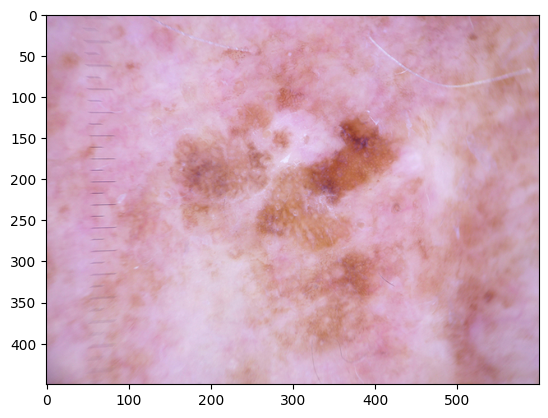

In [9]:

print("sanity check")
img = plt.imread(os.path.join(DATA_DIR, sub_train["Path"].values[0]))  # type: ignore
print(
    f"Image shape: {img.shape}, Image type: {img.dtype}, Image range: {img.min()} -"
    f" {img.max()}, Age: {sub_train['Age_multi'].values[0]}, Sex:"
    f" {sub_train['Sex'].values[0]}"
)
plt.imshow(img)


In [10]:
num_images = demo_data.shape[0]
print(f"Number of images: {num_images}")

num_male = len(demo_data[demo_data["Sex"] == 0])
print(f"Number of Males: {num_male}")

num_female = len(demo_data[demo_data["Sex"] == 1])
print(f"Number of Females: {num_female}")

assert num_male + num_female == num_images

num_under_60 = len(demo_data[demo_data["Age"] == 0])
print(f"Number of Under 60: {num_under_60}")

num_over_60 = len(demo_data[demo_data["Age"] == 1])
print(f"Number of Over 60: {num_over_60}")

assert num_under_60 + num_over_60 == num_images

num_benign = len(demo_data[demo_data["binaryLabel"] == 0])
print(f"Number of Benign: {num_benign}")

num_malignant = len(demo_data[demo_data["binaryLabel"] == 1])
print(f"Number of Malignant: {num_malignant}")

assert num_benign + num_malignant == num_images

Number of images: 9958
Number of Males: 5400
Number of Females: 4558
Number of Under 60: 7159
Number of Over 60: 2799
Number of Benign: 8520
Number of Malignant: 1438


In [12]:

print(f"percentage of male images: {num_male / num_images * 100}")
print(f"percentage of female images: {num_female / num_images * 100}")

num_male_positive_label = len(demo_data[demo_data["Sex"] == 0][demo_data["binaryLabel"] == 1])
num_male_negative_label = len(demo_data[demo_data["Sex"] == 0][demo_data["binaryLabel"] == 0])
assert num_male_positive_label + num_male_negative_label == num_male

print(f"prevalence of positive class in male: {num_male_positive_label / num_male * 100}")

num_female_positive_label = len(demo_data[demo_data["Sex"] == 1][demo_data["binaryLabel"] == 1])
print(f"prevalence of positive class in female: {num_female_positive_label / num_female * 100}")


print(f"percentage of under 60 images: {num_under_60 / num_images * 100}")
print(f"percentage of over 60 images: {num_over_60 / num_images * 100}")

num_under_60_positive_label = len(demo_data[demo_data["Age"] == 0][demo_data["binaryLabel"] == 1])
num_under_60_negative_label = len(demo_data[demo_data["Age"] == 0][demo_data["binaryLabel"] == 0])
assert num_under_60_positive_label + num_under_60_negative_label == num_under_60

print(f"prevalence of positive class in under 60: {num_under_60_positive_label / num_under_60 * 100}")

num_over_60_positive_label = len(demo_data[demo_data["Age"] == 1][demo_data["binaryLabel"] == 1])
print(f"prevalence of positive class in over 60: {num_over_60_positive_label / num_over_60 * 100}")


percentage of male images: 54.22775657762603
percentage of female images: 45.77224342237397
prevalence of positive class in male: 16.814814814814817
prevalence of positive class in female: 11.627906976744185
percentage of under 60 images: 71.8919461739305
percentage of over 60 images: 28.10805382606949
prevalence of positive class in under 60: 9.554407040089398
prevalence of positive class in over 60: 26.93819221150411


/tmp/ipykernel_777622/500316818.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_positive_label = len(demo_data[demo_data["Sex"] == 0][demo_data["binaryLabel"] == 1])
/tmp/ipykernel_777622/500316818.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_male_negative_label = len(demo_data[demo_data["Sex"] == 0][demo_data["binaryLabel"] == 0])
/tmp/ipykernel_777622/500316818.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_female_positive_label = len(demo_data[demo_data["Sex"] == 1][demo_data["binaryLabel"] == 1])
/tmp/ipykernel_777622/500316818.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_under_60_positive_label = len(demo_data[demo_data["Age"] == 0][demo_data["binaryLabel"] == 1])
/tmp/ipykernel_777622/500316818.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  num_under_60_negative_label = l